In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [2]:
marketing_cost = pd.read_excel("data/marketing_cost.xlsx",index_col ="기업명",thousands = ",") 
marketing_cost.head(16)



,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021,Unnamed: 20
기업명,,,,,,,,,,,,,,,,,,,,
넥슨,31730000000,36500000000,51220000000,59100000000,56310000000,56100000000,62790000000,68460000000,51940000000,55000000000,37670000000,42600000000,28360000000,43260000000,58520000000,74010000000,3.132000e+10,2.968000e+10,5.078000e+10,NaN
엔씨소프트,12701000000,24115000000,22043000000,24151000000,10771000000,14973000000,16513000000,15894000000,18987000000,24230000000,22766000000,41291000000,39573000000,12898000000,29723000000,44813000000,5.495000e+10,5.558200e+10,5.391200e+10,NaN
넷마블,78400000000,82400000000,101000000000,119400000000,74700000000,78600000000,85100000000,73400000000,62800000000,83600000000,72300000000,73700000000,95000000000,124900000000,85700000000,86800000000,7.760000e+10,1.004000e+11,1.004000e+11,NaN
카카오게임즈,24959000000,21929000000,33460000000,36130000000,47941000000,45311000000,36274000000,54538000000,32947000000,38500000000,36800000000,41526000000,29900000000,38500000000,76300000000,87500000000,6.720000e+10,9.110000e+10,1.481000e+11,NaN
NHN,2043700000,2087900000,2069000000,2176100000,1593400000,1422300000,1412500000,1390900000,1210100000,1467600000,1672000000,1891100000,1502600000,1821900000,2071400000,2376900000,2.246900e+09,2.098800e+09,1.807700e+09,NaN
컴투스,12020000000,19007000000,13900000000,21300000000,13300000000,187000000,179000000,21700000000,14600000000,16400000000,16000000000,14600000000,8200000000,21100000000,21500000000,20700000000,1.860000e+10,4.490000e+10,1.330000e+10,NaN
데브시스터즈,1432000000,325000000,92000000,621000000,34000000,267000000,193000000,870000000,303000000,1424000000,455000000,1918000000,1067000000,1831000000,1288000000,3154000000,1.200000e+09,2.100000e+10,1.890000e+10,NaN
그라비티,3007770750,3007770750,3007770750,3007770750,4136462000,4136462000,4136462000,4136462000,2493421750,2493421750,2493421750,2493421750,4946807250,4946807250,4946807250,4946807250,NaN,NaN,NaN,NaN
펄어비스,1254000000,1220000000,1455000000,5212000000,10506000000,9195000000,9959000000,10029000000,30251000000,15435000000,15835000000,16760000000,9444000000,9166000000,9228000000,16135000000,1.514800e+10,1.302200e+10,1.184200e+10,NaN


In [3]:
############### 빈 컬럼제거

marketing_cost.info()

del marketing_cost["Unnamed: 20"]

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 넥슨 to 베스파
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1Q2017       16 non-null     int64  
 1   2Q2017       16 non-null     int64  
 2   3Q2017       16 non-null     int64  
 3   4Q2017       16 non-null     int64  
 4   1Q2018       16 non-null     int64  
 5   2Q2018       16 non-null     int64  
 6   3Q2018       16 non-null     int64  
 7   4Q2018       16 non-null     int64  
 8   1Q2019       16 non-null     int64  
 9   2Q2019       16 non-null     int64  
 10  3Q2019       16 non-null     int64  
 11  4Q2019       16 non-null     int64  
 12  1Q2020       16 non-null     int64  
 13  2Q2020       16 non-null     int64  
 14  3Q2020       16 non-null     int64  
 15  4Q2020       16 non-null     int64  
 16  1Q2021       15 non-null     float64
 17  2Q2021       15 non-null     float64
 18  3Q2021       15 non-null     float64
 19  Unnamed: 20  

In [4]:
marketing_cost.info()     

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 넥슨 to 베스파
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1Q2017  16 non-null     int64  
 1   2Q2017  16 non-null     int64  
 2   3Q2017  16 non-null     int64  
 3   4Q2017  16 non-null     int64  
 4   1Q2018  16 non-null     int64  
 5   2Q2018  16 non-null     int64  
 6   3Q2018  16 non-null     int64  
 7   4Q2018  16 non-null     int64  
 8   1Q2019  16 non-null     int64  
 9   2Q2019  16 non-null     int64  
 10  3Q2019  16 non-null     int64  
 11  4Q2019  16 non-null     int64  
 12  1Q2020  16 non-null     int64  
 13  2Q2020  16 non-null     int64  
 14  3Q2020  16 non-null     int64  
 15  4Q2020  16 non-null     int64  
 16  1Q2021  15 non-null     float64
 17  2Q2021  15 non-null     float64
 18  3Q2021  15 non-null     float64
dtypes: float64(3), int64(16)
memory usage: 2.5+ KB


In [5]:
# 결측치 처리

marketing_costT =marketing_cost.T



marketing_costT["그라비티"] = marketing_costT["그라비티"].fillna(marketing_costT.loc[:, "그라비티"].mean())
marketing_costT


기업명,넥슨,엔씨소프트,넷마블,카카오게임즈,NHN,컴투스,데브시스터즈,그라비티,펄어비스,웹젠,네오위즈,위메이드,게임빌,선데이토즈,엠게임,베스파
1Q2017,3.173000e+10,1.270100e+10,7.840000e+10,2.495900e+10,2.043700e+09,1.202000e+10,1.432000e+09,3.007771e+09,1.254000e+09,1.831000e+09,3.140000e+09,9.059000e+09,1.866000e+09,3.800000e+08,43233000.0,1.977658e+09
2Q2017,3.650000e+10,2.411500e+10,8.240000e+10,2.192900e+10,2.087900e+09,1.900700e+10,3.250000e+08,3.007771e+09,1.220000e+09,2.528000e+09,3.153000e+09,1.015000e+09,4.056000e+09,2.560000e+08,927644000.0,1.977658e+09
3Q2017,5.122000e+10,2.204300e+10,1.010000e+11,3.346000e+10,2.069000e+09,1.390000e+10,9.200000e+07,3.007771e+09,1.455000e+09,9.700000e+08,3.844000e+09,5.630000e+08,1.190000e+09,4.110000e+08,74484000.0,1.977658e+09
4Q2017,5.910000e+10,2.415100e+10,1.194000e+11,3.613000e+10,2.176100e+09,2.130000e+10,6.210000e+08,3.007771e+09,5.212000e+09,1.669000e+09,3.742000e+09,7.570000e+08,4.299000e+09,2.625000e+09,73813000.0,1.977658e+09
1Q2018,5.631000e+10,1.077100e+10,7.470000e+10,4.794100e+10,1.593400e+09,1.330000e+10,3.400000e+07,4.136462e+09,1.050600e+10,1.735000e+09,4.217000e+09,6.660000e+08,4.643000e+09,1.741000e+09,40739000.0,9.300195e+09
2Q2018,5.610000e+10,1.497300e+10,7.860000e+10,4.531100e+10,1.422300e+09,1.870000e+08,2.670000e+08,4.136462e+09,9.195000e+09,4.739000e+09,5.534000e+09,1.830000e+09,1.186000e+09,3.980000e+09,80000000.0,9.300195e+09
3Q2018,6.279000e+10,1.651300e+10,8.510000e+10,3.627400e+10,1.412500e+09,1.790000e+08,1.930000e+08,4.136462e+09,9.959000e+09,4.536000e+09,5.873000e+09,6.498000e+09,2.998000e+09,1.496000e+09,62007000.0,9.300195e+09
4Q2018,6.846000e+10,1.589400e+10,7.340000e+10,5.453800e+10,1.390900e+09,2.170000e+10,8.700000e+08,4.136462e+09,1.002900e+10,2.380000e+09,8.306000e+09,1.780000e+09,3.615000e+09,2.980000e+08,111071000.0,9.300195e+09
1Q2019,5.194000e+10,1.898700e+10,6.280000e+10,3.294700e+10,1.210100e+09,1.460000e+10,3.030000e+08,2.493422e+09,3.025100e+10,2.922000e+09,9.750000e+09,4.790000e+09,2.334000e+09,3.420000e+08,111147000.0,9.019984e+09
2Q2019,5.500000e+10,2.423000e+10,8.360000e+10,3.850000e+10,1.467600e+09,1.640000e+10,1.424000e+09,2.493422e+09,1.543500e+10,4.717000e+08,8.502000e+09,1.830000e+09,1.924000e+09,1.193000e+09,59612000.0,7.257181e+09


In [6]:

marketing_cost = marketing_costT.T

In [7]:

#기업 별 합계 

marketing_cost.loc[:,"기업 별 합계"] = marketing_cost.sum(axis = 1)  



In [8]:
marketing_cost.sort_values(by="기업 별 합계", ascending=False).head(16)

,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021,기업 별 합계
기업명,,,,,,,,,,,,,,,,,,,,
넷마블,7.840000e+10,8.240000e+10,1.010000e+11,1.194000e+11,7.470000e+10,7.860000e+10,8.510000e+10,7.340000e+10,6.280000e+10,8.360000e+10,7.230000e+10,7.370000e+10,9.500000e+10,1.249000e+11,8.570000e+10,8.680000e+10,7.760000e+10,1.004000e+11,1.004000e+11,1.656200e+12
카카오게임즈,2.495900e+10,2.192900e+10,3.346000e+10,3.613000e+10,4.794100e+10,4.531100e+10,3.627400e+10,5.453800e+10,3.294700e+10,3.850000e+10,3.680000e+10,4.152600e+10,2.990000e+10,3.850000e+10,7.630000e+10,8.750000e+10,6.720000e+10,9.110000e+10,1.481000e+11,9.889150e+11
넥슨,3.173000e+10,3.650000e+10,5.122000e+10,5.910000e+10,5.631000e+10,5.610000e+10,6.279000e+10,6.846000e+10,5.194000e+10,5.500000e+10,3.767000e+10,4.260000e+10,2.836000e+10,4.326000e+10,5.852000e+10,7.401000e+10,3.132000e+10,2.968000e+10,5.078000e+10,9.253500e+11
엔씨소프트,1.270100e+10,2.411500e+10,2.204300e+10,2.415100e+10,1.077100e+10,1.497300e+10,1.651300e+10,1.589400e+10,1.898700e+10,2.423000e+10,2.276600e+10,4.129100e+10,3.957300e+10,1.289800e+10,2.972300e+10,4.481300e+10,5.495000e+10,5.558200e+10,5.391200e+10,5.398860e+11
컴투스,1.202000e+10,1.900700e+10,1.390000e+10,2.130000e+10,1.330000e+10,1.870000e+08,1.790000e+08,2.170000e+10,1.460000e+10,1.640000e+10,1.600000e+10,1.460000e+10,8.200000e+09,2.110000e+10,2.150000e+10,2.070000e+10,1.860000e+10,4.490000e+10,1.330000e+10,3.114930e+11
펄어비스,1.254000e+09,1.220000e+09,1.455000e+09,5.212000e+09,1.050600e+10,9.195000e+09,9.959000e+09,1.002900e+10,3.025100e+10,1.543500e+10,1.583500e+10,1.676000e+10,9.444000e+09,9.166000e+09,9.228000e+09,1.613500e+10,1.514800e+10,1.302200e+10,1.184200e+10,2.110960e+11
네오위즈,3.140000e+09,3.153000e+09,3.844000e+09,3.742000e+09,4.217000e+09,5.534000e+09,5.873000e+09,8.306000e+09,9.750000e+09,8.502000e+09,1.035200e+10,9.949000e+09,6.564000e+09,9.185000e+09,1.106200e+10,1.018500e+10,5.964000e+09,6.609000e+09,1.103100e+10,1.369620e+11
베스파,1.977658e+09,1.977658e+09,1.977658e+09,1.977658e+09,9.300195e+09,9.300195e+09,9.300195e+09,9.300195e+09,9.019984e+09,7.257181e+09,1.314333e+10,2.132255e+10,3.537390e+09,4.948341e+09,5.317439e+09,4.984956e+09,4.043107e+09,4.692425e+09,3.059742e+09,1.264379e+11
그라비티,3.007771e+09,3.007771e+09,3.007771e+09,3.007771e+09,4.136462e+09,4.136462e+09,4.136462e+09,4.136462e+09,2.493422e+09,2.493422e+09,2.493422e+09,2.493422e+09,4.946807e+09,4.946807e+09,4.946807e+09,4.946807e+09,3.646115e+09,3.646115e+09,3.646115e+09,6.927619e+10


<AxesSubplot:ylabel='기업명'>

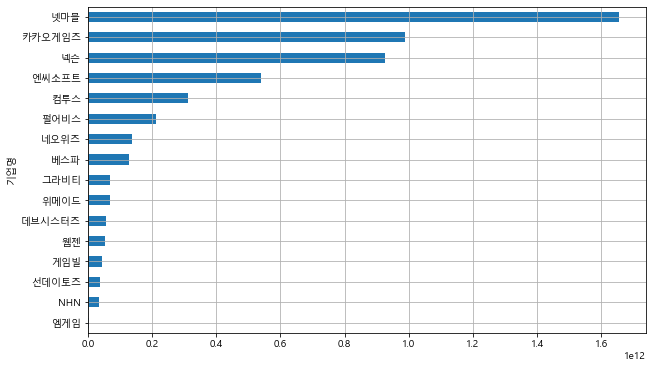

In [9]:
#기업 별 합계 그래프


marketing_cost["기업 별 합계"].sort_values().plot(kind="barh", figsize=(10,6),grid=True) 


<AxesSubplot:xlabel='기업명'>

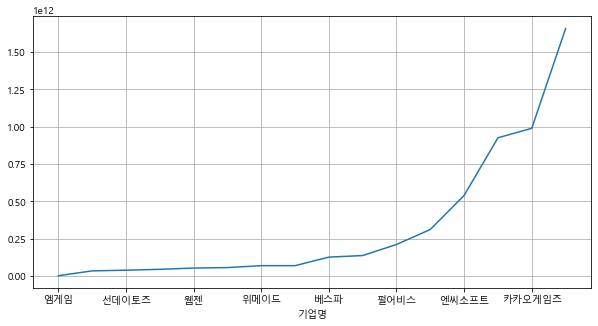

In [10]:
#기업 별 합계 그래프

marketing_cost["기업 별 합계"].sort_values().plot(kind="line", figsize=(10,5),grid=True) 

In [11]:
#### 분기별... 합계


Total = marketing_cost['1Q2017'].sum()
print ("2017년 1분기:",Total)

Total = marketing_cost['2Q2017'].sum()
print ("2017년 2분기:",Total)

Total = marketing_cost['3Q2017'].sum()
print ("2017년 3분기:",Total)

Total = marketing_cost['4Q2017'].sum()
print ("2017년 4분기:",Total) 

print ("\n-------------------------------------\n")

Total = marketing_cost['1Q2018'].sum()
print ("2018년 1분기:",Total) 

Total = marketing_cost['2Q2018'].sum()
print ("2018년 2분기:",Total) 

Total = marketing_cost['3Q2018'].sum()
print ("2018년 3분기:",Total) 

Total = marketing_cost['4Q2018'].sum()
print ("2018년 4분기:",Total) 

print ("\n-------------------------------------\n")


Total = marketing_cost['1Q2019'].sum()
print ("2019년 1분기:", Total) 

Total = marketing_cost['2Q2019'].sum()
print ("2019년 2분기:",Total) 

Total = marketing_cost['3Q2019'].sum()
print ("2019년 3분기:",Total) 

Total = marketing_cost['4Q2019'].sum()
print ("2019년 4분기:",Total) 

print ("\n-------------------------------------\n")


Total = marketing_cost['1Q2020'].sum()
print ("2020년 1분기:",Total) 

Total = marketing_cost['2Q2020'].sum()
print ("2020년 2분기:",Total) 

Total = marketing_cost['3Q2020'].sum()
print ("2020년 3분기:",Total) 

Total = marketing_cost['4Q2020'].sum()
print ("2020년 4분기:",Total) 

print ("\n-------------------------------------\n")


Total = marketing_cost['1Q2021'].sum()
print ("2021년 1분기:",Total) 

Total = marketing_cost['2Q2021'].sum()
print ("2021년 2분기:",Total) 

Total = marketing_cost['3Q2021'].sum()
print ("2021년 3분기:",Total) 

2017년 1분기: 185844362250.0
2017년 2분기: 204504973250.0
2017년 3분기: 237276913250.0
2017년 4분기: 286241342250.0

-------------------------------------

2018년 1분기: 241634796250.0
2018년 2분기: 236840957250.0
2018년 3분기: 247320164250.0
2018년 4분기: 276208628250.0

-------------------------------------

2019년 1분기: 244800652750.0
2019년 2분기: 259787514750.0
2019년 3분기: 234679277750.0
2019년 4분기: 282093263750.0

-------------------------------------

2020년 1분기: 234771647250.0
2020년 2분기: 283822365250.0
2020년 3분기: 323359659250.0
2020년 4분기: 374936031250.0

-------------------------------------

2021년 1분기: 291422436437.5
2021년 2분기: 387389136437.5
2021년 3분기: 431647205437.5


In [12]:

##### 분기별 합계를 행에 추가

marketing_cost.loc["분기별 합계", :] = marketing_cost.sum(axis = 0)

In [13]:
marketing_cost

,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021,기업 별 합계
기업명,,,,,,,,,,,,,,,,,,,,
넥슨,3.173000e+10,3.650000e+10,5.122000e+10,5.910000e+10,5.631000e+10,5.610000e+10,6.279000e+10,6.846000e+10,5.194000e+10,5.500000e+10,3.767000e+10,4.260000e+10,2.836000e+10,4.326000e+10,5.852000e+10,7.401000e+10,3.132000e+10,2.968000e+10,5.078000e+10,9.253500e+11
엔씨소프트,1.270100e+10,2.411500e+10,2.204300e+10,2.415100e+10,1.077100e+10,1.497300e+10,1.651300e+10,1.589400e+10,1.898700e+10,2.423000e+10,2.276600e+10,4.129100e+10,3.957300e+10,1.289800e+10,2.972300e+10,4.481300e+10,5.495000e+10,5.558200e+10,5.391200e+10,5.398860e+11
넷마블,7.840000e+10,8.240000e+10,1.010000e+11,1.194000e+11,7.470000e+10,7.860000e+10,8.510000e+10,7.340000e+10,6.280000e+10,8.360000e+10,7.230000e+10,7.370000e+10,9.500000e+10,1.249000e+11,8.570000e+10,8.680000e+10,7.760000e+10,1.004000e+11,1.004000e+11,1.656200e+12
카카오게임즈,2.495900e+10,2.192900e+10,3.346000e+10,3.613000e+10,4.794100e+10,4.531100e+10,3.627400e+10,5.453800e+10,3.294700e+10,3.850000e+10,3.680000e+10,4.152600e+10,2.990000e+10,3.850000e+10,7.630000e+10,8.750000e+10,6.720000e+10,9.110000e+10,1.481000e+11,9.889150e+11
NHN,2.043700e+09,2.087900e+09,2.069000e+09,2.176100e+09,1.593400e+09,1.422300e+09,1.412500e+09,1.390900e+09,1.210100e+09,1.467600e+09,1.672000e+09,1.891100e+09,1.502600e+09,1.821900e+09,2.071400e+09,2.376900e+09,2.246900e+09,2.098800e+09,1.807700e+09,3.436280e+10
컴투스,1.202000e+10,1.900700e+10,1.390000e+10,2.130000e+10,1.330000e+10,1.870000e+08,1.790000e+08,2.170000e+10,1.460000e+10,1.640000e+10,1.600000e+10,1.460000e+10,8.200000e+09,2.110000e+10,2.150000e+10,2.070000e+10,1.860000e+10,4.490000e+10,1.330000e+10,3.114930e+11
데브시스터즈,1.432000e+09,3.250000e+08,9.200000e+07,6.210000e+08,3.400000e+07,2.670000e+08,1.930000e+08,8.700000e+08,3.030000e+08,1.424000e+09,4.550000e+08,1.918000e+09,1.067000e+09,1.831000e+09,1.288000e+09,3.154000e+09,1.200000e+09,2.100000e+10,1.890000e+10,5.637400e+10
그라비티,3.007771e+09,3.007771e+09,3.007771e+09,3.007771e+09,4.136462e+09,4.136462e+09,4.136462e+09,4.136462e+09,2.493422e+09,2.493422e+09,2.493422e+09,2.493422e+09,4.946807e+09,4.946807e+09,4.946807e+09,4.946807e+09,3.646115e+09,3.646115e+09,3.646115e+09,6.927619e+10
펄어비스,1.254000e+09,1.220000e+09,1.455000e+09,5.212000e+09,1.050600e+10,9.195000e+09,9.959000e+09,1.002900e+10,3.025100e+10,1.543500e+10,1.583500e+10,1.676000e+10,9.444000e+09,9.166000e+09,9.228000e+09,1.613500e+10,1.514800e+10,1.302200e+10,1.184200e+10,2.110960e+11


<AxesSubplot:>

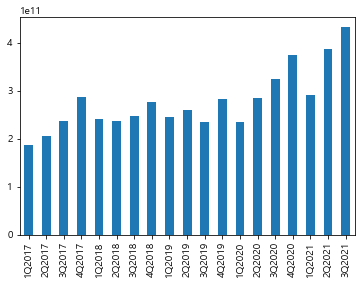

In [14]:
##### 분기별 그래프 그리기


marketing_cost.loc["분기별 합계", :"3Q2021"].plot(kind = "bar")

<AxesSubplot:>

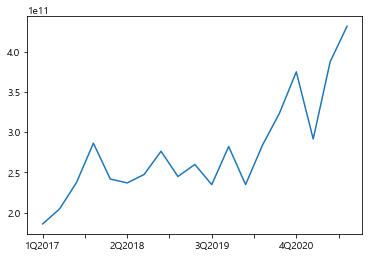

In [15]:
##### 분기별 그래프 그리기

marketing_cost.loc["분기별 합계", :"3Q2021"].plot(kind = "line")

